# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import seaborn as  sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

import patsy

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

##### Carregando e tratando a base

In [2]:
# carregando a base
df = pd.read_csv('previsao_de_renda.csv')

# retirando variáveis 
# df = df.drop(['Unnamed: 0', 'index', 'data_ref'], axis=1)
df = df.drop(['Unnamed: 0', 'data_ref', 'index'], axis=1)
# df = df.set_index(['index'])

# transformando variáveis qualitativas em dummies
# df = pd.get_dummies(df, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True).copy()

# alterando variáveis bool para int
df[['posse_de_veiculo', 'posse_de_imovel', 'mau']] = df[['posse_de_veiculo', 'posse_de_imovel', 'mau']].astype(int)
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,F,0,1,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,0,3369.24
1,M,1,1,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,0,6096.14
2,M,1,1,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,0,5658.98
3,F,1,0,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,0,7246.69
4,M,0,0,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,0,4017.37


##### Tratando dados ausentes

In [3]:
df.isnull().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [4]:
# ajustando com Zero os missings da variável tempo_emprego
df['tempo_emprego'] = df['tempo_emprego'].fillna(0)
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
mau                      0
renda                    0
dtype: int64

##### Análise da base

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  int32  
 2   posse_de_imovel        15000 non-null  int32  
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          15000 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  mau                    15000 non-null  int32  
 12  renda                  15000 non-null  float64
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 1.3+ MB


##### 1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [6]:
X_train, X_test = train_test_split(df, test_size=0.25, random_state=2360873)

# verificando X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 13371 to 13820
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   3750 non-null   object 
 1   posse_de_veiculo       3750 non-null   int32  
 2   posse_de_imovel        3750 non-null   int32  
 3   qtd_filhos             3750 non-null   int64  
 4   tipo_renda             3750 non-null   object 
 5   educacao               3750 non-null   object 
 6   estado_civil           3750 non-null   object 
 7   tipo_residencia        3750 non-null   object 
 8   idade                  3750 non-null   int64  
 9   tempo_emprego          3750 non-null   float64
 10  qt_pessoas_residencia  3750 non-null   float64
 11  mau                    3750 non-null   int32  
 12  renda                  3750 non-null   float64
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 366.2+ KB


##### 2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?

In [7]:
modelo_test = patsy.dmatrices('''renda ~ C(sexo) 
                                                + posse_de_veiculo 
                                                + posse_de_imovel
                                                + qtd_filhos 
                                                + C(tipo_renda)
                                                + C(educacao) 
                                                + C(estado_civil) 
                                                + C(tipo_residencia) 
                                                + idade
                                                + tempo_emprego
                                                + qt_pessoas_residencia 
                                                + mau''', X_test)

md = smf.ols(modelo_test, data=X_test)

In [8]:
# alpha 0

reg_test_ridge_1 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=0.00001,
    alpha=0
)

reg_test_ridge_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.19
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          2.08e-169
Time:                        14:28:45   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3724   BIC:                         7.279e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2699.2285   2744.231     -0.984      0.325   -8079.572    2681.115
C(sexo)[T.M]                         2247.6094    153.166     14.674      0.000    1947.311    2547.907
C(tipo_renda)[T.Bolsista]            1799.9175   2738.350      0.657      0.511   -3568.895    7168.730
C(tipo_renda)[T.Empresário]          1074.4771    162.157      6.626      0.000     756.552    1392.403
C(tipo_renda)[T.Pensionista]         1291.2266    260.540      4.956      0.000     780.412    1802.041
C(tipo_renda)[T.Servidor público]     -20.5338    233.524     -0.088      0.930    -478.381     437.313
C(educacao)[T.Pós graduação]         2841.8782   2017.865      1.408      0.159   -1114.350    6798.106
C(educacao)[T.Secundário]             379.6868    569.268      0.667      0.505    -736.422    1495.795
C(educacao)[T.Superior completo]     1115.5212    575.418      1.939      0.053     -12.644    2243.687
C(educacao)[T.Superior incompleto]    429.2305    647.211      0.663      0.507    -839.693    1698.154
C(estado_civil)[T.Separado]           778.4767   1331.027      0.585      0.559   -1831.136    3388.089
C(estado_civil)[T.Solteiro]          1117.5657   1302.088      0.858      0.391   -1435.309    3670.440
C(estado_civil)[T.União]               77.7285    246.484      0.315      0.753    -405.529     560.986
C(estado_civil)[T.Viúvo]             1293.3590   1343.444      0.963      0.336   -1340.598    3927.316
C(tipo_residencia)[T.Casa]            636.3237    619.450      1.027      0.304    -578.171    1850.818
C(tipo_residencia)[T.Com os pais]     438.9572    687.200      0.639      0.523    -908.368    1786.282
C(tipo_residencia)[T.Comunitário]     955.8492   1173.940      0.814      0.416   -1345.779    3257.478
C(tipo_residencia)[T.Estúdio]        2540.5128    958.413      2.651      0.008     661.448    4419.578
C(tipo_residencia)[T.Governamental]   -68.0552    723.883     -0.094      0.925   -1487.302    1351.192
posse_de_veiculo                       -8.6129    145.229     -0.059      0.953    -293.350     276.124
posse_de_imovel                       338.0551    140.146      2.412      0.016      63.285     612.825
qtd_filhos                          -1028.1014   1306.814     -0.787      0.431   -3590.242    1534.039
idade                                  18.4662      8.337      2.215      0.027       2.120      34.813
tempo_emprego                         275.1781     11.418     24.101      0.000     252.793     297.563
qt_pessoas_residencia                1013.7961   1302.293      0.778      0.436   -1539.480    3567.072
mau                                    16.2242    398.037      0.041      0.967    -764.168     796.616
===================================================================

In [9]:
# alpha 0.001

reg_test_ridge_2 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=0.00001,
    alpha=0.001
)

reg_test_ridge_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.19
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          2.08e-169
Time:                        14:28:47   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3724   BIC:                         7.279e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2699.2285   2744.231     -0.984      0.325   -8079.572    2681.115
C(sexo)[T.M]                         2247.6094    153.166     14.674      0.000    1947.311    2547.907
C(tipo_renda)[T.Bolsista]            1799.9175   2738.350      0.657      0.511   -3568.895    7168.730
C(tipo_renda)[T.Empresário]          1074.4771    162.157      6.626      0.000     756.552    1392.403
C(tipo_renda)[T.Pensionista]         1291.2266    260.540      4.956      0.000     780.412    1802.041
C(tipo_renda)[T.Servidor público]     -20.5338    233.524     -0.088      0.930    -478.381     437.313
C(educacao)[T.Pós graduação]         2841.8782   2017.865      1.408      0.159   -1114.350    6798.106
C(educacao)[T.Secundário]             379.6868    569.268      0.667      0.505    -736.422    1495.795
C(educacao)[T.Superior completo]     1115.5212    575.418      1.939      0.053     -12.644    2243.687
C(educacao)[T.Superior incompleto]    429.2305    647.211      0.663      0.507    -839.693    1698.154
C(estado_civil)[T.Separado]           778.4767   1331.027      0.585      0.559   -1831.136    3388.089
C(estado_civil)[T.Solteiro]          1117.5657   1302.088      0.858      0.391   -1435.309    3670.440
C(estado_civil)[T.União]               77.7285    246.484      0.315      0.753    -405.529     560.986
C(estado_civil)[T.Viúvo]             1293.3590   1343.444      0.963      0.336   -1340.598    3927.316
C(tipo_residencia)[T.Casa]            636.3237    619.450      1.027      0.304    -578.171    1850.818
C(tipo_residencia)[T.Com os pais]     438.9572    687.200      0.639      0.523    -908.368    1786.282
C(tipo_residencia)[T.Comunitário]     955.8492   1173.940      0.814      0.416   -1345.779    3257.478
C(tipo_residencia)[T.Estúdio]        2540.5128    958.413      2.651      0.008     661.448    4419.578
C(tipo_residencia)[T.Governamental]   -68.0552    723.883     -0.094      0.925   -1487.302    1351.192
posse_de_veiculo                       -8.6129    145.229     -0.059      0.953    -293.350     276.124
posse_de_imovel                       338.0551    140.146      2.412      0.016      63.285     612.825
qtd_filhos                          -1028.1014   1306.814     -0.787      0.431   -3590.242    1534.039
idade                                  18.4662      8.337      2.215      0.027       2.120      34.813
tempo_emprego                         275.1781     11.418     24.101      0.000     252.793     297.563
qt_pessoas_residencia                1013.7961   1302.293      0.778      0.436   -1539.480    3567.072
mau                                    16.2242    398.037      0.041      0.967    -764.168     796.616
===================================================================

In [10]:
# alpha 0.005

reg_test_ridge_3 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=0.00001,
    alpha=0.005
)

reg_test_ridge_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.19
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          2.08e-169
Time:                        14:28:48   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3724   BIC:                         7.279e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2699.2285   2744.231     -0.984      0.325   -8079.572    2681.115
C(sexo)[T.M]                         2247.6094    153.166     14.674      0.000    1947.311    2547.907
C(tipo_renda)[T.Bolsista]            1799.9175   2738.350      0.657      0.511   -3568.895    7168.730
C(tipo_renda)[T.Empresário]          1074.4771    162.157      6.626      0.000     756.552    1392.403
C(tipo_renda)[T.Pensionista]         1291.2266    260.540      4.956      0.000     780.412    1802.041
C(tipo_renda)[T.Servidor público]     -20.5338    233.524     -0.088      0.930    -478.381     437.313
C(educacao)[T.Pós graduação]         2841.8782   2017.865      1.408      0.159   -1114.350    6798.106
C(educacao)[T.Secundário]             379.6868    569.268      0.667      0.505    -736.422    1495.795
C(educacao)[T.Superior completo]     1115.5212    575.418      1.939      0.053     -12.644    2243.687
C(educacao)[T.Superior incompleto]    429.2305    647.211      0.663      0.507    -839.693    1698.154
C(estado_civil)[T.Separado]           778.4767   1331.027      0.585      0.559   -1831.136    3388.089
C(estado_civil)[T.Solteiro]          1117.5657   1302.088      0.858      0.391   -1435.309    3670.440
C(estado_civil)[T.União]               77.7285    246.484      0.315      0.753    -405.529     560.986
C(estado_civil)[T.Viúvo]             1293.3590   1343.444      0.963      0.336   -1340.598    3927.316
C(tipo_residencia)[T.Casa]            636.3237    619.450      1.027      0.304    -578.171    1850.818
C(tipo_residencia)[T.Com os pais]     438.9572    687.200      0.639      0.523    -908.368    1786.282
C(tipo_residencia)[T.Comunitário]     955.8492   1173.940      0.814      0.416   -1345.779    3257.478
C(tipo_residencia)[T.Estúdio]        2540.5128    958.413      2.651      0.008     661.448    4419.578
C(tipo_residencia)[T.Governamental]   -68.0552    723.883     -0.094      0.925   -1487.302    1351.192
posse_de_veiculo                       -8.6129    145.229     -0.059      0.953    -293.350     276.124
posse_de_imovel                       338.0551    140.146      2.412      0.016      63.285     612.825
qtd_filhos                          -1028.1014   1306.814     -0.787      0.431   -3590.242    1534.039
idade                                  18.4662      8.337      2.215      0.027       2.120      34.813
tempo_emprego                         275.1781     11.418     24.101      0.000     252.793     297.563
qt_pessoas_residencia                1013.7961   1302.293      0.778      0.436   -1539.480    3567.072
mau                                    16.2242    398.037      0.041      0.967    -764.168     796.616
===================================================================

In [11]:
# alpha 0.01

reg_test_ridge_4 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=0.00001,
    alpha=0.01
)

reg_test_ridge_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.19
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          2.08e-169
Time:                        14:28:49   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3724   BIC:                         7.279e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2699.2285   2744.231     -0.984      0.325   -8079.572    2681.115
C(sexo)[T.M]                         2247.6094    153.166     14.674      0.000    1947.311    2547.907
C(tipo_renda)[T.Bolsista]            1799.9175   2738.350      0.657      0.511   -3568.895    7168.730
C(tipo_renda)[T.Empresário]          1074.4771    162.157      6.626      0.000     756.552    1392.403
C(tipo_renda)[T.Pensionista]         1291.2266    260.540      4.956      0.000     780.412    1802.041
C(tipo_renda)[T.Servidor público]     -20.5338    233.524     -0.088      0.930    -478.381     437.313
C(educacao)[T.Pós graduação]         2841.8782   2017.865      1.408      0.159   -1114.350    6798.106
C(educacao)[T.Secundário]             379.6868    569.268      0.667      0.505    -736.422    1495.795
C(educacao)[T.Superior completo]     1115.5212    575.418      1.939      0.053     -12.644    2243.687
C(educacao)[T.Superior incompleto]    429.2305    647.211      0.663      0.507    -839.693    1698.154
C(estado_civil)[T.Separado]           778.4767   1331.027      0.585      0.559   -1831.136    3388.089
C(estado_civil)[T.Solteiro]          1117.5657   1302.088      0.858      0.391   -1435.309    3670.440
C(estado_civil)[T.União]               77.7285    246.484      0.315      0.753    -405.529     560.986
C(estado_civil)[T.Viúvo]             1293.3590   1343.444      0.963      0.336   -1340.598    3927.316
C(tipo_residencia)[T.Casa]            636.3237    619.450      1.027      0.304    -578.171    1850.818
C(tipo_residencia)[T.Com os pais]     438.9572    687.200      0.639      0.523    -908.368    1786.282
C(tipo_residencia)[T.Comunitário]     955.8492   1173.940      0.814      0.416   -1345.779    3257.478
C(tipo_residencia)[T.Estúdio]        2540.5128    958.413      2.651      0.008     661.448    4419.578
C(tipo_residencia)[T.Governamental]   -68.0552    723.883     -0.094      0.925   -1487.302    1351.192
posse_de_veiculo                       -8.6129    145.229     -0.059      0.953    -293.350     276.124
posse_de_imovel                       338.0551    140.146      2.412      0.016      63.285     612.825
qtd_filhos                          -1028.1014   1306.814     -0.787      0.431   -3590.242    1534.039
idade                                  18.4662      8.337      2.215      0.027       2.120      34.813
tempo_emprego                         275.1781     11.418     24.101      0.000     252.793     297.563
qt_pessoas_residencia                1013.7961   1302.293      0.778      0.436   -1539.480    3567.072
mau                                    16.2242    398.037      0.041      0.967    -764.168     796.616
===================================================================

In [12]:
# alpha 0.05

reg_test_ridge_5 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=0.00001,
    alpha=0.05
)

reg_test_ridge_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.19
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          2.08e-169
Time:                        14:28:50   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3724   BIC:                         7.279e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2699.2285   2744.231     -0.984      0.325   -8079.572    2681.115
C(sexo)[T.M]                         2247.6094    153.166     14.674      0.000    1947.311    2547.907
C(tipo_renda)[T.Bolsista]            1799.9175   2738.350      0.657      0.511   -3568.895    7168.730
C(tipo_renda)[T.Empresário]          1074.4771    162.157      6.626      0.000     756.552    1392.403
C(tipo_renda)[T.Pensionista]         1291.2266    260.540      4.956      0.000     780.412    1802.041
C(tipo_renda)[T.Servidor público]     -20.5338    233.524     -0.088      0.930    -478.381     437.313
C(educacao)[T.Pós graduação]         2841.8782   2017.865      1.408      0.159   -1114.350    6798.106
C(educacao)[T.Secundário]             379.6868    569.268      0.667      0.505    -736.422    1495.795
C(educacao)[T.Superior completo]     1115.5212    575.418      1.939      0.053     -12.644    2243.687
C(educacao)[T.Superior incompleto]    429.2305    647.211      0.663      0.507    -839.693    1698.154
C(estado_civil)[T.Separado]           778.4767   1331.027      0.585      0.559   -1831.136    3388.089
C(estado_civil)[T.Solteiro]          1117.5657   1302.088      0.858      0.391   -1435.309    3670.440
C(estado_civil)[T.União]               77.7285    246.484      0.315      0.753    -405.529     560.986
C(estado_civil)[T.Viúvo]             1293.3590   1343.444      0.963      0.336   -1340.598    3927.316
C(tipo_residencia)[T.Casa]            636.3237    619.450      1.027      0.304    -578.171    1850.818
C(tipo_residencia)[T.Com os pais]     438.9572    687.200      0.639      0.523    -908.368    1786.282
C(tipo_residencia)[T.Comunitário]     955.8492   1173.940      0.814      0.416   -1345.779    3257.478
C(tipo_residencia)[T.Estúdio]        2540.5128    958.413      2.651      0.008     661.448    4419.578
C(tipo_residencia)[T.Governamental]   -68.0552    723.883     -0.094      0.925   -1487.302    1351.192
posse_de_veiculo                       -8.6129    145.229     -0.059      0.953    -293.350     276.124
posse_de_imovel                       338.0551    140.146      2.412      0.016      63.285     612.825
qtd_filhos                          -1028.1014   1306.814     -0.787      0.431   -3590.242    1534.039
idade                                  18.4662      8.337      2.215      0.027       2.120      34.813
tempo_emprego                         275.1781     11.418     24.101      0.000     252.793     297.563
qt_pessoas_residencia                1013.7961   1302.293      0.778      0.436   -1539.480    3567.072
mau                                    16.2242    398.037      0.041      0.967    -764.168     796.616
===================================================================

In [13]:
# alpha 0.1

reg_test_ridge_6 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=0.00001,
    alpha=0.1
)

reg_test_ridge_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.19
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          2.08e-169
Time:                        14:28:50   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3724   BIC:                         7.279e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2699.2285   2744.231     -0.984      0.325   -8079.572    2681.115
C(sexo)[T.M]                         2247.6094    153.166     14.674      0.000    1947.311    2547.907
C(tipo_renda)[T.Bolsista]            1799.9175   2738.350      0.657      0.511   -3568.895    7168.730
C(tipo_renda)[T.Empresário]          1074.4771    162.157      6.626      0.000     756.552    1392.403
C(tipo_renda)[T.Pensionista]         1291.2266    260.540      4.956      0.000     780.412    1802.041
C(tipo_renda)[T.Servidor público]     -20.5338    233.524     -0.088      0.930    -478.381     437.313
C(educacao)[T.Pós graduação]         2841.8782   2017.865      1.408      0.159   -1114.350    6798.106
C(educacao)[T.Secundário]             379.6868    569.268      0.667      0.505    -736.422    1495.795
C(educacao)[T.Superior completo]     1115.5212    575.418      1.939      0.053     -12.644    2243.687
C(educacao)[T.Superior incompleto]    429.2305    647.211      0.663      0.507    -839.693    1698.154
C(estado_civil)[T.Separado]           778.4767   1331.027      0.585      0.559   -1831.136    3388.089
C(estado_civil)[T.Solteiro]          1117.5657   1302.088      0.858      0.391   -1435.309    3670.440
C(estado_civil)[T.União]               77.7285    246.484      0.315      0.753    -405.529     560.986
C(estado_civil)[T.Viúvo]             1293.3590   1343.444      0.963      0.336   -1340.598    3927.316
C(tipo_residencia)[T.Casa]            636.3237    619.450      1.027      0.304    -578.171    1850.818
C(tipo_residencia)[T.Com os pais]     438.9572    687.200      0.639      0.523    -908.368    1786.282
C(tipo_residencia)[T.Comunitário]     955.8492   1173.940      0.814      0.416   -1345.779    3257.478
C(tipo_residencia)[T.Estúdio]        2540.5128    958.413      2.651      0.008     661.448    4419.578
C(tipo_residencia)[T.Governamental]   -68.0552    723.883     -0.094      0.925   -1487.302    1351.192
posse_de_veiculo                       -8.6129    145.229     -0.059      0.953    -293.350     276.124
posse_de_imovel                       338.0551    140.146      2.412      0.016      63.285     612.825
qtd_filhos                          -1028.1014   1306.814     -0.787      0.431   -3590.242    1534.039
idade                                  18.4662      8.337      2.215      0.027       2.120      34.813
tempo_emprego                         275.1781     11.418     24.101      0.000     252.793     297.563
qt_pessoas_residencia                1013.7961   1302.293      0.778      0.436   -1539.480    3567.072
mau                                    16.2242    398.037      0.041      0.967    -764.168     796.616
===================================================================

##### Comparando os dados das regulariações Ridge

In [14]:
print(f"Modelo Ridge 1, Alpha: 0, R²: {reg_test_ridge_1.rsquared*100:.4f}%")
print(f"Modelo Ridge 1, Alpha: 0, R² ajustado: {reg_test_ridge_1.rsquared_adj*100:.2f}%")
print(f"Modelo Ridge 1, Alpha: 0, AIC: {reg_test_ridge_1.aic:.2f}")

print("")

print(f"Modelo Ridge 2, Alpha: 0.001, R²: {reg_test_ridge_2.rsquared*100:.4f}%")
print(f"Modelo Ridge 2, Alpha: 0.001, R² ajustado: {reg_test_ridge_2.rsquared_adj*100:.2f}%")
print(f"Modelo Ridge 2, Alpha: 0.001, AIC: {reg_test_ridge_2.aic:.2f}")

print("")

print(f"Modelo Ridge 3, Alpha: 0.005, R²: {reg_test_ridge_3.rsquared*100:.4f}%")
print(f"Modelo Ridge 3, Alpha: 0.005, R² ajustado: {reg_test_ridge_3.rsquared_adj*100:.2f}%")
print(f"Modelo Ridge 3, Alpha: 0.005, AIC: {reg_test_ridge_3.aic:.2f}")

print("")

print(f"Modelo Ridge 4, Alpha: 0.01, R²: {reg_test_ridge_4.rsquared*100:.4f}%")
print(f"Modelo Ridge 4, Alpha: 0.01, R² ajustado: {reg_test_ridge_4.rsquared_adj*100:.2f}%")
print(f"Modelo Ridge 4, Alpha: 0.01, AIC: {reg_test_ridge_4.aic:.2f}")

print("")

print(f"Modelo Ridge 5, Alpha: 0.05, R²: {reg_test_ridge_5.rsquared*100:.4f}%")
print(f"Modelo Ridge 5, Alpha: 0.05, R² ajustado: {reg_test_ridge_5.rsquared_adj*100:.2f}%")
print(f"Modelo Ridge 5, Alpha: 0.05, AIC: {reg_test_ridge_5.aic:.2f}")

print("")

print(f"Modelo Ridge 6, Alpha: 0.1, R²: {reg_test_ridge_6.rsquared*100:.4f}%")
print(f"Modelo Ridge 6, Alpha: 0.1, R² ajustado: {reg_test_ridge_6.rsquared_adj*100:.2f}%")
print(f"Modelo Ridge 6, Alpha: 0.1, AIC: {reg_test_ridge_6.aic:.2f}")

Modelo Ridge 1, Alpha: 0, R²: 21.0520%
Modelo Ridge 1, Alpha: 0, R² ajustado: 20.52%
Modelo Ridge 1, Alpha: 0, AIC: 72617.08

Modelo Ridge 2, Alpha: 0.001, R²: 21.0520%
Modelo Ridge 2, Alpha: 0.001, R² ajustado: 20.52%
Modelo Ridge 2, Alpha: 0.001, AIC: 72617.08

Modelo Ridge 3, Alpha: 0.005, R²: 21.0520%
Modelo Ridge 3, Alpha: 0.005, R² ajustado: 20.52%
Modelo Ridge 3, Alpha: 0.005, AIC: 72617.08

Modelo Ridge 4, Alpha: 0.01, R²: 21.0520%
Modelo Ridge 4, Alpha: 0.01, R² ajustado: 20.52%
Modelo Ridge 4, Alpha: 0.01, AIC: 72617.08

Modelo Ridge 5, Alpha: 0.05, R²: 21.0520%
Modelo Ridge 5, Alpha: 0.05, R² ajustado: 20.52%
Modelo Ridge 5, Alpha: 0.05, AIC: 72617.08

Modelo Ridge 6, Alpha: 0.1, R²: 21.0520%
Modelo Ridge 6, Alpha: 0.1, R² ajustado: 20.52%
Modelo Ridge 6, Alpha: 0.1, AIC: 72617.08


##### 3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

In [15]:
# alpha 0

reg_test_lasso_1 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=1,
    alpha=0
)

reg_test_lasso_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.19
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          2.08e-169
Time:                        14:28:51   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3724   BIC:                         7.279e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2699.2285   2744.231     -0.984      0.325   -8079.572    2681.115
C(sexo)[T.M]                         2247.6094    153.166     14.674      0.000    1947.311    2547.907
C(tipo_renda)[T.Bolsista]            1799.9175   2738.350      0.657      0.511   -3568.895    7168.730
C(tipo_renda)[T.Empresário]          1074.4771    162.157      6.626      0.000     756.552    1392.403
C(tipo_renda)[T.Pensionista]         1291.2266    260.540      4.956      0.000     780.412    1802.041
C(tipo_renda)[T.Servidor público]     -20.5338    233.524     -0.088      0.930    -478.381     437.313
C(educacao)[T.Pós graduação]         2841.8782   2017.865      1.408      0.159   -1114.350    6798.106
C(educacao)[T.Secundário]             379.6868    569.268      0.667      0.505    -736.422    1495.795
C(educacao)[T.Superior completo]     1115.5212    575.418      1.939      0.053     -12.644    2243.687
C(educacao)[T.Superior incompleto]    429.2305    647.211      0.663      0.507    -839.693    1698.154
C(estado_civil)[T.Separado]           778.4767   1331.027      0.585      0.559   -1831.136    3388.089
C(estado_civil)[T.Solteiro]          1117.5657   1302.088      0.858      0.391   -1435.309    3670.440
C(estado_civil)[T.União]               77.7285    246.484      0.315      0.753    -405.529     560.986
C(estado_civil)[T.Viúvo]             1293.3590   1343.444      0.963      0.336   -1340.598    3927.316
C(tipo_residencia)[T.Casa]            636.3237    619.450      1.027      0.304    -578.171    1850.818
C(tipo_residencia)[T.Com os pais]     438.9572    687.200      0.639      0.523    -908.368    1786.282
C(tipo_residencia)[T.Comunitário]     955.8492   1173.940      0.814      0.416   -1345.779    3257.478
C(tipo_residencia)[T.Estúdio]        2540.5128    958.413      2.651      0.008     661.448    4419.578
C(tipo_residencia)[T.Governamental]   -68.0552    723.883     -0.094      0.925   -1487.302    1351.192
posse_de_veiculo                       -8.6129    145.229     -0.059      0.953    -293.350     276.124
posse_de_imovel                       338.0551    140.146      2.412      0.016      63.285     612.825
qtd_filhos                          -1028.1014   1306.814     -0.787      0.431   -3590.242    1534.039
idade                                  18.4662      8.337      2.215      0.027       2.120      34.813
tempo_emprego                         275.1781     11.418     24.101      0.000     252.793     297.563
qt_pessoas_residencia                1013.7961   1302.293      0.778      0.436   -1539.480    3567.072
mau                                    16.2242    398.037      0.041      0.967    -764.168     796.616
===================================================================

In [16]:
# alpha 0.001

reg_test_lasso_2 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=1,
    alpha=0.001
)

reg_test_lasso_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.19
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          2.08e-169
Time:                        14:28:52   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3724   BIC:                         7.279e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2699.2285   2744.231     -0.984      0.325   -8079.572    2681.115
C(sexo)[T.M]                         2247.6094    153.166     14.674      0.000    1947.311    2547.907
C(tipo_renda)[T.Bolsista]            1799.9175   2738.350      0.657      0.511   -3568.895    7168.730
C(tipo_renda)[T.Empresário]          1074.4771    162.157      6.626      0.000     756.552    1392.403
C(tipo_renda)[T.Pensionista]         1291.2266    260.540      4.956      0.000     780.412    1802.041
C(tipo_renda)[T.Servidor público]     -20.5338    233.524     -0.088      0.930    -478.381     437.313
C(educacao)[T.Pós graduação]         2841.8782   2017.865      1.408      0.159   -1114.350    6798.106
C(educacao)[T.Secundário]             379.6868    569.268      0.667      0.505    -736.422    1495.795
C(educacao)[T.Superior completo]     1115.5212    575.418      1.939      0.053     -12.644    2243.687
C(educacao)[T.Superior incompleto]    429.2305    647.211      0.663      0.507    -839.693    1698.154
C(estado_civil)[T.Separado]           778.4767   1331.027      0.585      0.559   -1831.136    3388.089
C(estado_civil)[T.Solteiro]          1117.5657   1302.088      0.858      0.391   -1435.309    3670.440
C(estado_civil)[T.União]               77.7285    246.484      0.315      0.753    -405.529     560.986
C(estado_civil)[T.Viúvo]             1293.3590   1343.444      0.963      0.336   -1340.598    3927.316
C(tipo_residencia)[T.Casa]            636.3237    619.450      1.027      0.304    -578.171    1850.818
C(tipo_residencia)[T.Com os pais]     438.9572    687.200      0.639      0.523    -908.368    1786.282
C(tipo_residencia)[T.Comunitário]     955.8492   1173.940      0.814      0.416   -1345.779    3257.478
C(tipo_residencia)[T.Estúdio]        2540.5128    958.413      2.651      0.008     661.448    4419.578
C(tipo_residencia)[T.Governamental]   -68.0552    723.883     -0.094      0.925   -1487.302    1351.192
posse_de_veiculo                       -8.6129    145.229     -0.059      0.953    -293.350     276.124
posse_de_imovel                       338.0551    140.146      2.412      0.016      63.285     612.825
qtd_filhos                          -1028.1014   1306.814     -0.787      0.431   -3590.242    1534.039
idade                                  18.4662      8.337      2.215      0.027       2.120      34.813
tempo_emprego                         275.1781     11.418     24.101      0.000     252.793     297.563
qt_pessoas_residencia                1013.7961   1302.293      0.778      0.436   -1539.480    3567.072
mau                                    16.2242    398.037      0.041      0.967    -764.168     796.616
===================================================================

In [17]:
# alpha 0.005

reg_test_lasso_3 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=1,
    alpha=0.005
)

reg_test_lasso_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.19
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          2.08e-169
Time:                        14:28:53   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3724   BIC:                         7.279e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2699.2285   2744.231     -0.984      0.325   -8079.572    2681.115
C(sexo)[T.M]                         2247.6094    153.166     14.674      0.000    1947.311    2547.907
C(tipo_renda)[T.Bolsista]            1799.9175   2738.350      0.657      0.511   -3568.895    7168.730
C(tipo_renda)[T.Empresário]          1074.4771    162.157      6.626      0.000     756.552    1392.403
C(tipo_renda)[T.Pensionista]         1291.2266    260.540      4.956      0.000     780.412    1802.041
C(tipo_renda)[T.Servidor público]     -20.5338    233.524     -0.088      0.930    -478.381     437.313
C(educacao)[T.Pós graduação]         2841.8782   2017.865      1.408      0.159   -1114.350    6798.106
C(educacao)[T.Secundário]             379.6868    569.268      0.667      0.505    -736.422    1495.795
C(educacao)[T.Superior completo]     1115.5212    575.418      1.939      0.053     -12.644    2243.687
C(educacao)[T.Superior incompleto]    429.2305    647.211      0.663      0.507    -839.693    1698.154
C(estado_civil)[T.Separado]           778.4767   1331.027      0.585      0.559   -1831.136    3388.089
C(estado_civil)[T.Solteiro]          1117.5657   1302.088      0.858      0.391   -1435.309    3670.440
C(estado_civil)[T.União]               77.7285    246.484      0.315      0.753    -405.529     560.986
C(estado_civil)[T.Viúvo]             1293.3590   1343.444      0.963      0.336   -1340.598    3927.316
C(tipo_residencia)[T.Casa]            636.3237    619.450      1.027      0.304    -578.171    1850.818
C(tipo_residencia)[T.Com os pais]     438.9572    687.200      0.639      0.523    -908.368    1786.282
C(tipo_residencia)[T.Comunitário]     955.8492   1173.940      0.814      0.416   -1345.779    3257.478
C(tipo_residencia)[T.Estúdio]        2540.5128    958.413      2.651      0.008     661.448    4419.578
C(tipo_residencia)[T.Governamental]   -68.0552    723.883     -0.094      0.925   -1487.302    1351.192
posse_de_veiculo                       -8.6129    145.229     -0.059      0.953    -293.350     276.124
posse_de_imovel                       338.0551    140.146      2.412      0.016      63.285     612.825
qtd_filhos                          -1028.1014   1306.814     -0.787      0.431   -3590.242    1534.039
idade                                  18.4662      8.337      2.215      0.027       2.120      34.813
tempo_emprego                         275.1781     11.418     24.101      0.000     252.793     297.563
qt_pessoas_residencia                1013.7961   1302.293      0.778      0.436   -1539.480    3567.072
mau                                    16.2242    398.037      0.041      0.967    -764.168     796.616
===================================================================

In [18]:
# alpha 0.01

reg_test_lasso_4 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=1,
    alpha=0.01
)

reg_test_lasso_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.19
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          2.08e-169
Time:                        14:28:54   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3724   BIC:                         7.279e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2699.2285   2744.231     -0.984      0.325   -8079.572    2681.115
C(sexo)[T.M]                         2247.6094    153.166     14.674      0.000    1947.311    2547.907
C(tipo_renda)[T.Bolsista]            1799.9175   2738.350      0.657      0.511   -3568.895    7168.730
C(tipo_renda)[T.Empresário]          1074.4771    162.157      6.626      0.000     756.552    1392.403
C(tipo_renda)[T.Pensionista]         1291.2266    260.540      4.956      0.000     780.412    1802.041
C(tipo_renda)[T.Servidor público]     -20.5338    233.524     -0.088      0.930    -478.381     437.313
C(educacao)[T.Pós graduação]         2841.8782   2017.865      1.408      0.159   -1114.350    6798.106
C(educacao)[T.Secundário]             379.6868    569.268      0.667      0.505    -736.422    1495.795
C(educacao)[T.Superior completo]     1115.5212    575.418      1.939      0.053     -12.644    2243.687
C(educacao)[T.Superior incompleto]    429.2305    647.211      0.663      0.507    -839.693    1698.154
C(estado_civil)[T.Separado]           778.4767   1331.027      0.585      0.559   -1831.136    3388.089
C(estado_civil)[T.Solteiro]          1117.5657   1302.088      0.858      0.391   -1435.309    3670.440
C(estado_civil)[T.União]               77.7285    246.484      0.315      0.753    -405.529     560.986
C(estado_civil)[T.Viúvo]             1293.3590   1343.444      0.963      0.336   -1340.598    3927.316
C(tipo_residencia)[T.Casa]            636.3237    619.450      1.027      0.304    -578.171    1850.818
C(tipo_residencia)[T.Com os pais]     438.9572    687.200      0.639      0.523    -908.368    1786.282
C(tipo_residencia)[T.Comunitário]     955.8492   1173.940      0.814      0.416   -1345.779    3257.478
C(tipo_residencia)[T.Estúdio]        2540.5128    958.413      2.651      0.008     661.448    4419.578
C(tipo_residencia)[T.Governamental]   -68.0552    723.883     -0.094      0.925   -1487.302    1351.192
posse_de_veiculo                       -8.6129    145.229     -0.059      0.953    -293.350     276.124
posse_de_imovel                       338.0551    140.146      2.412      0.016      63.285     612.825
qtd_filhos                          -1028.1014   1306.814     -0.787      0.431   -3590.242    1534.039
idade                                  18.4662      8.337      2.215      0.027       2.120      34.813
tempo_emprego                         275.1781     11.418     24.101      0.000     252.793     297.563
qt_pessoas_residencia                1013.7961   1302.293      0.778      0.436   -1539.480    3567.072
mau                                    16.2242    398.037      0.041      0.967    -764.168     796.616
===================================================================

In [19]:
# alpha 0.05

reg_test_lasso_5 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=1,
    alpha=0.05
)

reg_test_lasso_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     39.73
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          3.42e-170
Time:                        14:28:54   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.262e+04
Df Residuals:                    3725   BIC:                         7.278e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2647.6967   2739.030     -0.967      0.334   -8017.843    2722.449
C(sexo)[T.M]                         2245.5167    153.004     14.676      0.000    1945.537    2545.496
C(tipo_renda)[T.Bolsista]            1794.6203   2737.967      0.655      0.512   -3573.441    7162.682
C(tipo_renda)[T.Empresário]          1077.4999    161.854      6.657      0.000     760.169    1394.831
C(tipo_renda)[T.Pensionista]         1292.2236    260.489      4.961      0.000     781.508    1802.939
C(tipo_renda)[T.Servidor público]     -19.2484    233.460     -0.082      0.934    -476.970     438.473
C(educacao)[T.Pós graduação]         2827.5670   2017.110      1.402      0.161   -1127.182    6782.316
C(educacao)[T.Secundário]             372.4495    568.737      0.655      0.513    -742.617    1487.516
C(educacao)[T.Superior completo]     1106.2390    574.595      1.925      0.054     -20.313    2232.791
C(educacao)[T.Superior incompleto]    421.4113    646.658      0.652      0.515    -846.427    1689.250
C(estado_civil)[T.Separado]           757.0646   1329.133      0.570      0.569   -1848.835    3362.964
C(estado_civil)[T.Solteiro]          1095.0010   1299.963      0.842      0.400   -1453.708    3643.710
C(estado_civil)[T.União]                     0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]             1272.6789   1341.680      0.949      0.343   -1357.820    3903.178
C(tipo_residencia)[T.Casa]            638.5473    619.335      1.031      0.303    -575.721    1852.816
C(tipo_residencia)[T.Com os pais]     445.1759    686.834      0.648      0.517    -901.431    1791.783
C(tipo_residencia)[T.Comunitário]     953.3378   1173.771      0.812      0.417   -1347.959    3254.635
C(tipo_residencia)[T.Estúdio]        2539.6500    958.293      2.650      0.008     660.820    4418.480
C(tipo_residencia)[T.Governamental]   -67.8766    723.796     -0.094      0.925   -1486.951    1351.198
posse_de_veiculo                      -10.9795    145.018     -0.076      0.940    -295.301     273.342
posse_de_imovel                       336.8450    140.076      2.405      0.016      62.211     611.479
qtd_filhos                          -1014.7934   1305.974     -0.777      0.437   -3575.288    1545.701
idade                                  18.2763      8.315      2.198      0.028       1.975      34.578
tempo_emprego                         275.1969     11.416     24.106      0.000     252.815     297.579
qt_pessoas_residencia                 999.5550   1301.352      0.768      0.442   -1551.877    3550.987
mau                                    18.3191    397.934      0.046      0.963    -761.870     798.508
===================================================================

In [20]:
# alpha 0.1

reg_test_lasso_6 = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=1,
    alpha=0.1
)

reg_test_lasso_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     41.36
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          7.25e-171
Time:                        14:28:55   Log-Likelihood:                -36282.
No. Observations:                3750   AIC:                         7.261e+04
Df Residuals:                    3726   BIC:                         7.277e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2383.2027   2719.479     -0.876      0.381   -7715.015    2948.609
C(sexo)[T.M]                         2242.1870    152.942     14.660      0.000    1942.329    2542.045
C(tipo_renda)[T.Bolsista]            1788.5169   2737.832      0.653      0.514   -3579.279    7156.313
C(tipo_renda)[T.Empresário]          1074.0964    161.792      6.639      0.000     756.886    1391.307
C(tipo_renda)[T.Pensionista]         1283.5731    260.259      4.932      0.000     773.308    1793.838
C(tipo_renda)[T.Servidor público]     -21.1620    233.437     -0.091      0.928    -478.839     436.515
C(educacao)[T.Pós graduação]         2816.5909   2016.973      1.396      0.163   -1137.888    6771.070
C(educacao)[T.Secundário]             360.3571    568.516      0.634      0.526    -754.276    1474.990
C(educacao)[T.Superior completo]     1098.6869    574.494      1.912      0.056     -27.666    2225.040
C(educacao)[T.Superior incompleto]    414.8870    646.579      0.642      0.521    -852.796    1682.570
C(estado_civil)[T.Separado]           755.9855   1329.072      0.569      0.570   -1849.793    3361.764
C(estado_civil)[T.Solteiro]          1091.4208   1299.896      0.840      0.401   -1457.157    3639.998
C(estado_civil)[T.União]                     0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]             1272.7248   1341.619      0.949      0.343   -1357.654    3903.104
C(tipo_residencia)[T.Casa]            377.7383    529.562      0.713      0.476    -660.521    1415.998
C(tipo_residencia)[T.Com os pais]     185.6672    607.962      0.305      0.760   -1006.304    1377.639
C(tipo_residencia)[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia)[T.Estúdio]        2279.7898    903.264      2.524      0.012     508.850    4050.729
C(tipo_residencia)[T.Governamental]  -329.3488    648.230     -0.508      0.611   -1600.270     941.572
posse_de_veiculo                       -8.3103    144.974     -0.057      0.954    -292.546     275.925
posse_de_imovel                       335.2451    140.056      2.394      0.017      60.651     609.839
qtd_filhos                          -1013.1056   1305.913     -0.776      0.438   -3573.480    1547.269
idade                                  18.5908      8.305      2.238      0.025       2.307      34.874
tempo_emprego                         275.0742     11.414     24.099      0.000     252.695     297.453
qt_pessoas_residencia                 997.9765   1301.291      0.767      0.443   -1553.336    3549.289
mau                                    20.3252    397.908      0.051      0.959    -759.813     800.463
===================================================================

##### Comparando os dados das regulariações Lasso

In [21]:
print(f"Modelo Lasso 1, Alpha: 0, R²: {reg_test_lasso_1.rsquared*100:.4f}%")
print(f"Modelo Lasso 1, Alpha: 0, R² ajustado: {reg_test_lasso_1.rsquared_adj*100:.2f}%")
print(f"Modelo Lasso 1, Alpha: 0, AIC: {reg_test_lasso_1.aic:.2f}")

print("")

print(f"Modelo Lasso 2, Alpha: 0.001, R²: {reg_test_lasso_2.rsquared*100:.4f}%")
print(f"Modelo Lasso 2, Alpha: 0.001, R² ajustado: {reg_test_lasso_2.rsquared_adj*100:.2f}%")
print(f"Modelo Lasso 2, Alpha: 0.001, AIC: {reg_test_lasso_2.aic:.2f}")

print("")

print(f"Modelo Lasso 3, Alpha: 0.005, R²: {reg_test_lasso_3.rsquared*100:.4f}%")
print(f"Modelo Lasso 3, Alpha: 0.005, R² ajustado: {reg_test_lasso_3.rsquared_adj*100:.2f}%")
print(f"Modelo Lasso 3, Alpha: 0.005, AIC: {reg_test_lasso_3.aic:.2f}")

print("")

print(f"Modelo Lasso 4, Alpha: 0.01, R²: {reg_test_lasso_4.rsquared*100:.4f}%")
print(f"Modelo Lasso 4, Alpha: 0.01, R² ajustado: {reg_test_lasso_4.rsquared_adj*100:.2f}%")
print(f"Modelo Lasso 4, Alpha: 0.01, AIC: {reg_test_lasso_4.aic:.2f}")

print("")

print(f"Modelo Lasso 5, Alpha: 0.05, R²: {reg_test_lasso_5.rsquared*100:.4f}%")
print(f"Modelo Lasso 5, Alpha: 0.05, R² ajustado: {reg_test_lasso_5.rsquared_adj*100:.2f}%")
print(f"Modelo Lasso 5, Alpha: 0.05, AIC: {reg_test_lasso_5.aic:.2f}")

print("")

print(f"Modelo Lasso 6, Alpha: 0.1, R²: {reg_test_lasso_6.rsquared*100:.4f}%")
print(f"Modelo Lasso 6, Alpha: 0.1, R² ajustado: {reg_test_lasso_6.rsquared_adj*100:.2f}%")
print(f"Modelo Lasso 6, Alpha: 0.1, AIC: {reg_test_lasso_6.aic:.2f}")

Modelo Lasso 1, Alpha: 0, R²: 21.0520%
Modelo Lasso 1, Alpha: 0, R² ajustado: 20.52%
Modelo Lasso 1, Alpha: 0, AIC: 72617.08

Modelo Lasso 2, Alpha: 0.001, R²: 21.0520%
Modelo Lasso 2, Alpha: 0.001, R² ajustado: 20.52%
Modelo Lasso 2, Alpha: 0.001, AIC: 72617.08

Modelo Lasso 3, Alpha: 0.005, R²: 21.0520%
Modelo Lasso 3, Alpha: 0.005, R² ajustado: 20.52%
Modelo Lasso 3, Alpha: 0.005, AIC: 72617.08

Modelo Lasso 4, Alpha: 0.01, R²: 21.0520%
Modelo Lasso 4, Alpha: 0.01, R² ajustado: 20.52%
Modelo Lasso 4, Alpha: 0.01, AIC: 72617.08

Modelo Lasso 5, Alpha: 0.05, R²: 21.0499%
Modelo Lasso 5, Alpha: 0.05, R² ajustado: 20.54%
Modelo Lasso 5, Alpha: 0.05, AIC: 72615.18

Modelo Lasso 6, Alpha: 0.1, R²: 21.0359%
Modelo Lasso 6, Alpha: 0.1, R² ajustado: 20.55%
Modelo Lasso 6, Alpha: 0.1, AIC: 72613.84


##### 4. Rode um modelo *stepwise*. Avalie o $R^2$ na base de testes. Qual o melhor resultado?

In [22]:
# transformando variáveis qualitativas em dummies
X = pd.get_dummies(X_test, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True).copy()
X.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,sexo_M,tipo_renda_Bolsista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
13371,0,1,0,30,0.758904,2.0,0,2668.47,0,0,...,0,0,0,1,0,1,0,0,0,0
12198,1,1,3,43,13.109589,5.0,0,5461.49,1,0,...,0,0,0,0,0,1,0,0,0,0
3058,0,1,1,26,5.613699,3.0,0,1109.53,0,0,...,1,0,0,0,0,1,0,0,0,0
6650,1,0,0,31,2.758904,2.0,0,1139.93,0,0,...,0,0,0,0,0,0,1,0,0,0
10975,1,0,0,38,8.186301,1.0,0,6547.85,0,0,...,0,0,1,0,0,1,0,0,0,0


In [23]:
y = X['renda'].copy()
y.head()

13371    2668.47
12198    5461.49
3058     1109.53
6650     1139.93
10975    6547.85
Name: renda, dtype: float64

In [24]:
X = X.drop(['renda'], axis=1).copy()
X.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
13371,0,1,0,30,0.758904,2.0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
12198,1,1,3,43,13.109589,5.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3058,0,1,1,26,5.613699,3.0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
6650,1,0,0,31,2.758904,2.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10975,1,0,0,38,8.186301,1.0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [25]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 2.84379e-115
#############
['tempo_emprego']
Add  sexo_M                         with p-value 1.45157e-45
#############
['tempo_emprego', 'sexo_M']
Add  tipo_renda_Pensionista         with p-value 1.68456e-12
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista']
Add  tipo_renda_Empresário          with p-value 3.45211e-13
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'tipo_renda_Empresário']
Add  educacao_Superior completo     with p-value 6.44117e-08
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'tipo_renda_Empresário', 'educacao_Superior completo']
Add  posse_de_imovel                with p-value 0.00332803
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'tipo_renda_Empresário', 'educacao_Superior completo', 'posse_de_imovel']
Add  tipo_residencia_Estúdio        with p-value 0.00865956
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'tipo_

In [26]:
reg_stepwise = sm.OLS(y, sm.add_constant(pd.DataFrame(X[variaveis]))).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     123.1
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          1.36e-183
Time:                        14:28:56   Log-Likelihood:                -36287.
No. Observations:                3750   AIC:                         7.259e+04
Df Residuals:                    3741   BIC:                         7.265e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        231.4228    332.301      0.696      0.486    -420.086     882.931
tempo_emprego                274.7894     11.265     24.394      0.000     252.704     296.875
sexo_M                      2237.9269    140.782     15.896      0.000    1961.911    2513.943
tipo_renda_Pensionista      1294.1449    256.205      5.051      0.000     791.831    1796.459
tipo_renda_Empresário       1080.9943    157.688      6.855      0.000     771.832    1390.156
educacao_Superior completo   733.2122    133.264      5.502      0.000     471.936     994.488
posse_de_imovel              374.9204    136.547      2.746      0.006     107.206     642.634
tipo_residencia_Estúdio     1932.7025    735.900      2.626      0.009     489.898    3375.507
idade                         19.9276      7.701      2.588      0.010       4.829      35.026
==============================================================================
Omnibus:                     2721.793   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73961.941
Skew:                           3.147   Prob(JB):                         0.00
Kurtosis:                      23.827   Cond. No.                         537.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Comparando os dados da regularização Stepwise

In [27]:
print(f"Reg Stepwise, R²: {reg_stepwise.rsquared*100:.4f}%")
print(f"Reg Stepwise, R² ajustado: {reg_stepwise.rsquared_adj*100:.2f}%")
print(f"Reg Stepwise, AIC: {reg_stepwise.aic:.2f}")

Reg Stepwise, R²: 20.8420%
Reg Stepwise, R² ajustado: 20.67%
Reg Stepwise, AIC: 72591.04


##### 5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?

#### Resposta:

Os modelos Lasso e Ridge ficaram com os mesmos resultados de R², R ajustado e AIC.<br>
Os diferentes alphas não resultaram em alterações significativas.

O Stepwise teve perda no R² e no AIC, porém aumentou o R ajustado.<br>
Esse aumento não foi relevante.

Os modelos estão semelhantes.

##### 6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [28]:
'''
Alterações nas variáveis:
np.log(renda)
+ C(tipo_renda, Treatment(4))
+ C(educacao, Treatment(3))
 C(tipo_residencia, Treatment(3))
 
Variáveis escluídas:
+ Mau
+ posse_de_veiculo
+ C(estado_civil)
+ C(tipo_residencia, Treatment(4))
+ qtd_filhos
+ center(qt_pessoas_residencia)

'''
modelo_test_ajustado = patsy.dmatrices('''np.log(renda) ~ C(sexo)
                                                + posse_de_imovel
                                                + idade
                                                + tempo_emprego
                                                + C(tipo_renda, Treatment(4))
                                                + C(educacao, Treatment(3))
                                                + C(tipo_residencia, Treatment(3))
                                                ''', X_test)

md = smf.ols(modelo_test_ajustado, data=X_test)

In [29]:
reg_test_lasso_1_ajustado = md.fit_regularized(
    method='elastic_net',
    refit=True,
    L1_wt=1,
    alpha=0
)

reg_test_lasso_1_ajustado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     60.58
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          4.80e-192
Time:                        14:28:57   Log-Likelihood:                -3995.6
No. Observations:                3750   AIC:                             8029.
Df Residuals:                    3732   BIC:                             8148.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.5626      0.196     38.628      0.000       7.179       7.946
C(sexo)[T.M]                                          0.4887      0.026     18.951      0.000       0.438       0.539
C(tipo_renda, Treatment(4))[T.Assalariado]           -0.0404      0.042     -0.951      0.342      -0.124       0.043
C(tipo_renda, Treatment(4))[T.Bolsista]               0.6170      0.500      1.235      0.217      -0.363       1.597
C(tipo_renda, Treatment(4))[T.Empresário]             0.1411      0.046      3.044      0.002       0.050       0.232
C(tipo_renda, Treatment(4))[T.Pensionista]            0.2018      0.061      3.296      0.001       0.082       0.322
C(educacao, Treatment(3))[T.Primário]                -0.1834      0.104     -1.756      0.079      -0.388       0.021
C(educacao, Treatment(3))[T.Pós graduação]            0.2800      0.353      0.793      0.428      -0.412       0.972
C(educacao, Treatment(3))[T.Secundário]              -0.1223      0.025     -4.909      0.000      -0.171      -0.073
C(educacao, Treatment(3))[T.Superior incompleto]     -0.1462      0.060     -2.438      0.015      -0.264      -0.029
C(tipo_residencia, Treatment(3))[T.Aluguel]          -0.1872      0.214     -0.876      0.381      -0.606       0.232
C(tipo_residencia, Treatment(3))[T.Casa]             -0.0709      0.183     -0.388      0.698      -0.429       0.287
C(tipo_residencia, Treatment(3))[T.Com os pais]      -0.1086      0.191     -0.569      0.570      -0.483       0.266
C(tipo_residencia, Treatment(3))[T.Estúdio]           0.0520      0.226      0.230      0.818      -0.392       0.495
C(tipo_residencia, Treatment(3))[T.Governamental]    -0.1817      0.195     -0.932      0.351      -0.564       0.201
posse_de_imovel                                       0.0828      0.025      3.256      0.001       0.033       0.133
idade                                                 0.0026      0.001      1.830      0.067      -0.000       0.005
tempo_emprego                                         0.0507      0.002     24.441      0.000       0.047       0.055
==============================================================================
Omnibus:                        0.467   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.442
Skew:                          -0.026   Prob(JB):                        0.802
Kurtosis:                       3.013   Cond. No.                     2.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

In [30]:
print(f"Modelo Lasso 1, Alpha: 0, R²: {reg_test_lasso_1.rsquared*100:.4f}%")
print(f"Modelo Lasso 1, Alpha: 0, R² ajustado: {reg_test_lasso_1.rsquared_adj*100:.2f}%")
print(f"Modelo Lasso 1, Alpha: 0, AIC: {reg_test_lasso_1.aic:.2f}")

print("")

print(f"Modelo Lasso Ajustado 1, Alpha: 0, R²: {reg_test_lasso_1_ajustado.rsquared*100:.4f}%")
print(f"Modelo Lasso Ajustado 1, Alpha: 0, R² ajustado: {reg_test_lasso_1_ajustado.rsquared_adj*100:.2f}%")
print(f"Modelo Lasso Ajustado 1, Alpha: 0, AIC: {reg_test_lasso_1_ajustado.aic:.2f}")


Modelo Lasso 1, Alpha: 0, R²: 21.0520%
Modelo Lasso 1, Alpha: 0, R² ajustado: 20.52%
Modelo Lasso 1, Alpha: 0, AIC: 72617.08

Modelo Lasso Ajustado 1, Alpha: 0, R²: 22.6115%
Modelo Lasso Ajustado 1, Alpha: 0, R² ajustado: 22.26%
Modelo Lasso Ajustado 1, Alpha: 0, AIC: 8029.26


##### 7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [31]:
df.shape

(15000, 13)

In [32]:
df = df.drop_duplicates()

In [33]:
df.shape

(10482, 13)

In [34]:
df = pd.get_dummies(df, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True).copy()

In [50]:
X_arvore = df

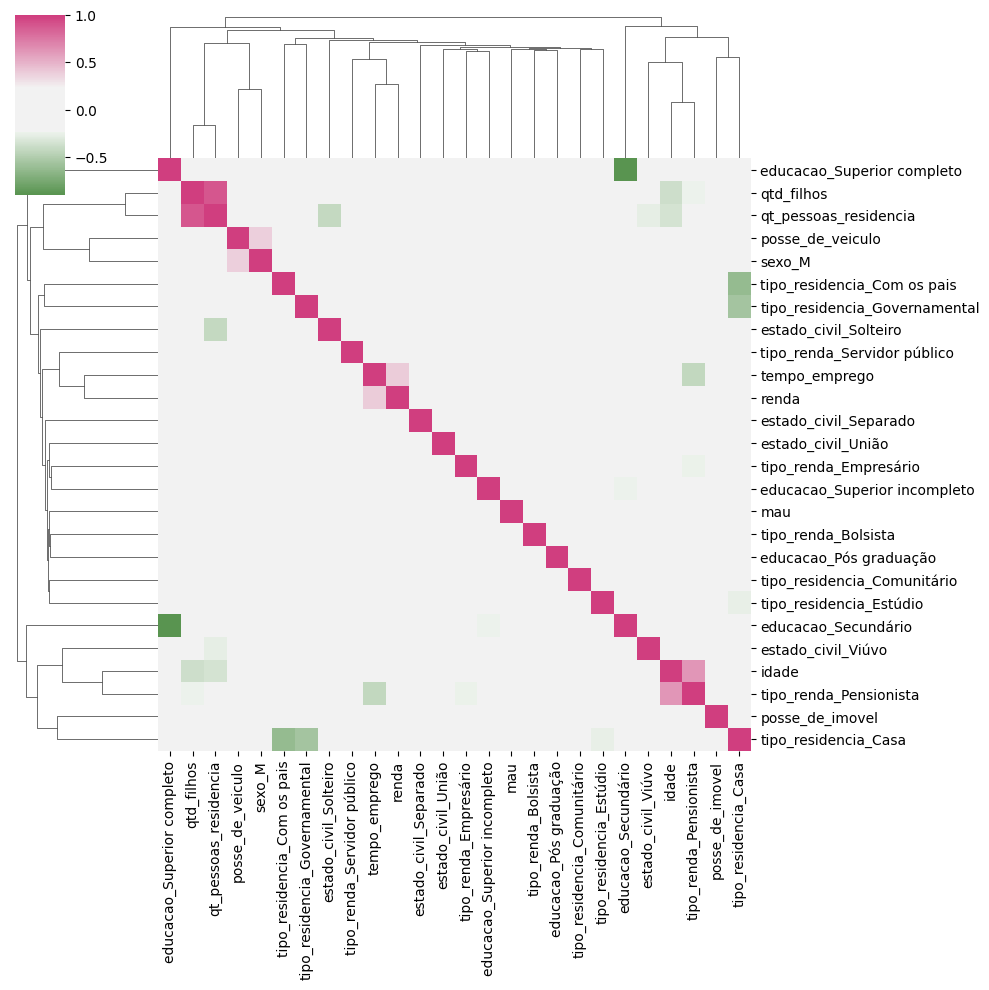

In [51]:
cmap = sns.diverging_palette(
    h_neg=125,
    h_pos=350,
    as_cmap=True,
    sep=60,
    center='light'
)

# cmap = sns.color_palette(
#     'colorblind',
#     as_cmap=True
# )

sns.clustermap(
    X_arvore.corr(),
    figsize=(10, 10),
    center=0,
    cmap=cmap
)

In [35]:
X_arvore = df.drop(['renda'], axis=1).copy()
y_arvore = df['renda']

In [36]:
X_arvore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10482 entries, 0 to 14992
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               10482 non-null  int32  
 1   posse_de_imovel                10482 non-null  int32  
 2   qtd_filhos                     10482 non-null  int64  
 3   idade                          10482 non-null  int64  
 4   tempo_emprego                  10482 non-null  float64
 5   qt_pessoas_residencia          10482 non-null  float64
 6   mau                            10482 non-null  int32  
 7   sexo_M                         10482 non-null  uint8  
 8   tipo_renda_Bolsista            10482 non-null  uint8  
 9   tipo_renda_Empresário          10482 non-null  uint8  
 10  tipo_renda_Pensionista         10482 non-null  uint8  
 11  tipo_renda_Servidor público    10482 non-null  uint8  
 12  educacao_Pós graduação         10482 non-null 

In [37]:
y_arvore

0        3369.24
1        6096.14
2        5658.98
3        7246.69
4        4017.37
          ...   
14983    1367.87
14989    9645.79
14990    1852.11
14991    1541.46
14992    9787.92
Name: renda, Length: 10482, dtype: float64

In [38]:
X_train_arvore, X_test_arvore, y_train_arvore, y_test_arvore = train_test_split(X_arvore, y_arvore, test_size=0.25, random_state=2360873)

In [39]:
reg_arvore_1 = DecisionTreeRegressor(max_depth=2)
reg_arvore_2 = DecisionTreeRegressor(max_depth=8)

reg_arvore_1.fit(X_test_arvore, y_test_arvore)
reg_arvore_2.fit(X_test_arvore, y_test_arvore)

DecisionTreeRegressor(max_depth=8)

In [40]:
mse1 = reg_arvore_1.score(X_test_arvore, y_test_arvore)
mse2 = reg_arvore_2.score(X_test_arvore, y_test_arvore)

template = "O R-quadrado da árvore com profundidade={0} é: {1:.2f}"

print(template.format(reg_arvore_1.get_depth(), mse1).replace(".", ","))
print(template.format(reg_arvore_2.get_depth(), mse2).replace(".", ","))

O R-quadrado da árvore com profundidade=2 é: 0,19
O R-quadrado da árvore com profundidade=8 é: 0,50


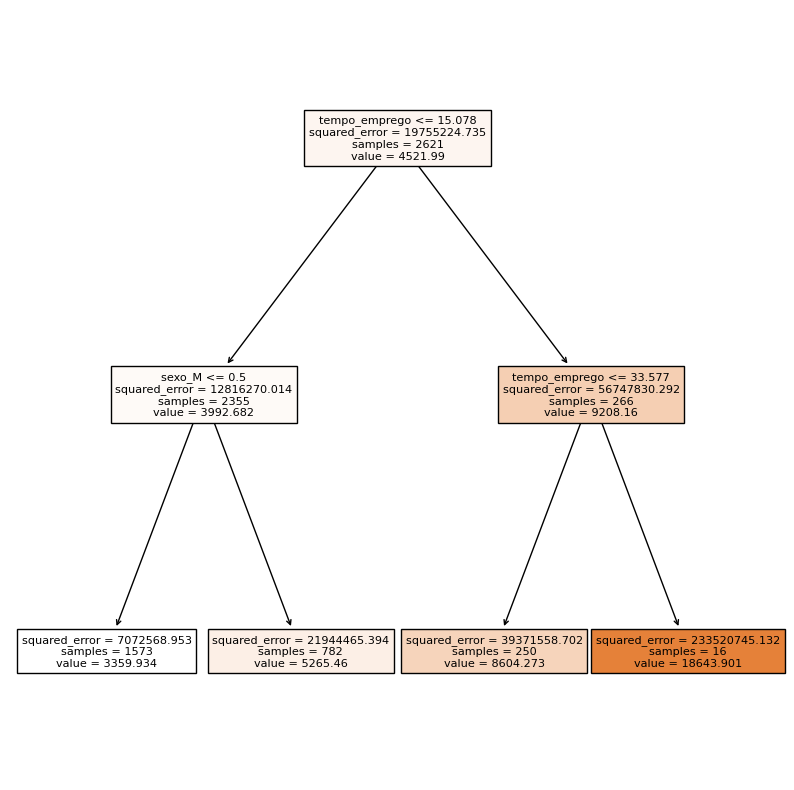

In [41]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(reg_arvore_1,
                    feature_names=X_arvore.columns,
                    filled=True)

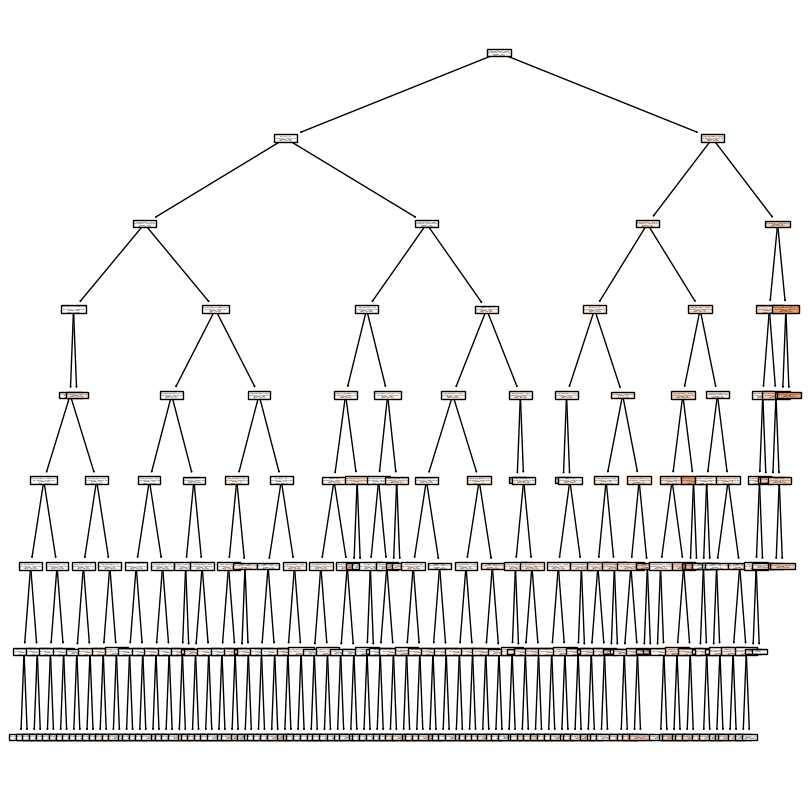

In [42]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(reg_arvore_2,
                    feature_names=X_arvore.columns,
                    filled=True)

In [43]:
# Pré poda da melhor árvore

reg_arvore_2 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=20)
reg_arvore_2.fit(X_train_arvore, y_train_arvore)
mse1 = reg_arvore_2.score(X_test_arvore, y_test_arvore)
mse1

0.142710551239551

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.142711,0.142711,0.142711,0.142711,0.142711,0.142711,0.142711,0.142711
3,0.153280,0.153280,0.153280,0.153280,0.153280,0.172843,0.172843,0.172843
4,0.129944,0.129944,0.129944,0.129944,0.129944,0.162000,0.162000,0.160963
5,0.057529,0.057412,0.057412,0.057892,0.141432,0.142591,0.142886,0.161338
6,0.039836,-0.004448,0.052412,0.047254,0.125164,0.122583,0.128746,0.148017
7,-0.015422,-0.051841,0.007243,0.012677,0.093731,0.109911,0.112958,0.129344
8,-0.073229,-0.096924,-0.027962,-0.003267,0.086328,0.100657,0.103714,0.117344


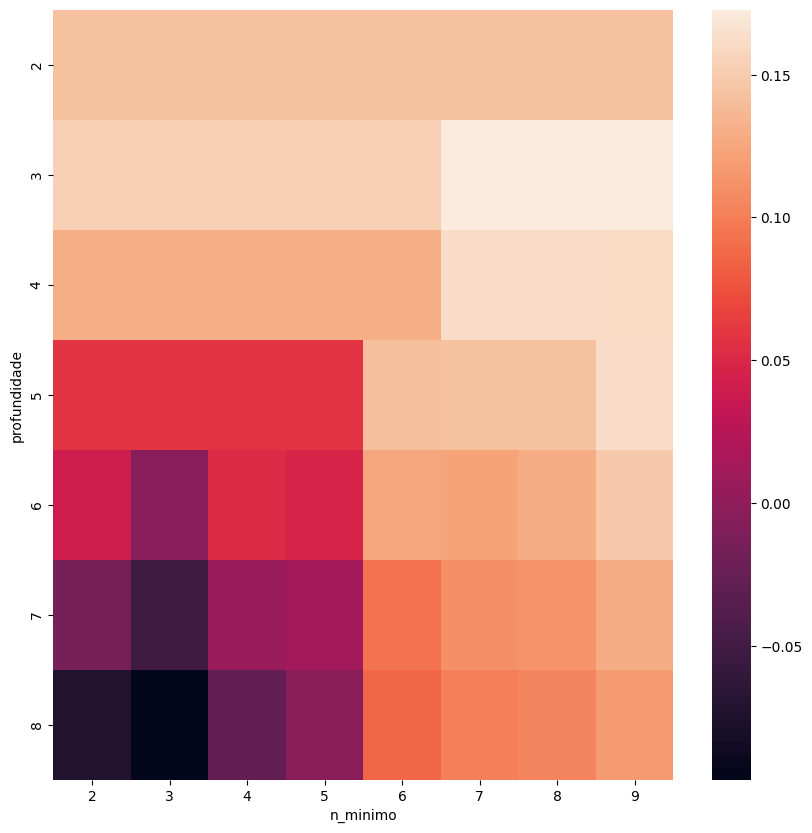

In [44]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train_arvore, y_train_arvore)
        mse1 = regr_1.score(X_test_arvore, y_test_arvore)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',
            columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [45]:
path = reg_arvore_2.cost_complexity_pruning_path(X_test_arvore, y_test_arvore)
path

{'ccp_alphas': array([      0.        ,  557728.21426251,  723614.26213872,
        2480429.33687546]),
 'impurities': array([15993452.9221762 , 16551181.13643871, 17274795.39857743,
        19755224.73545289])}

Text(0, 0.5, 'Impureza total das folhas')

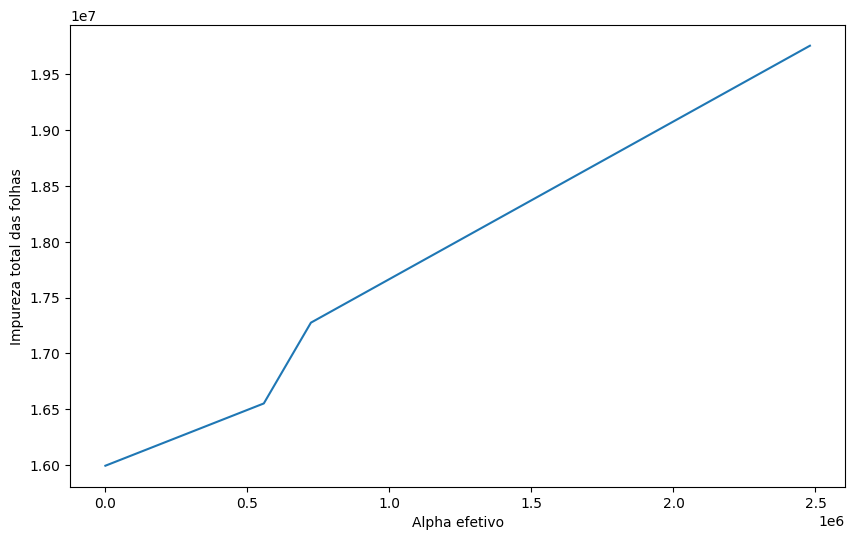

In [46]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [47]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_test_arvore, y_test_arvore)
    clfs.append(clf)

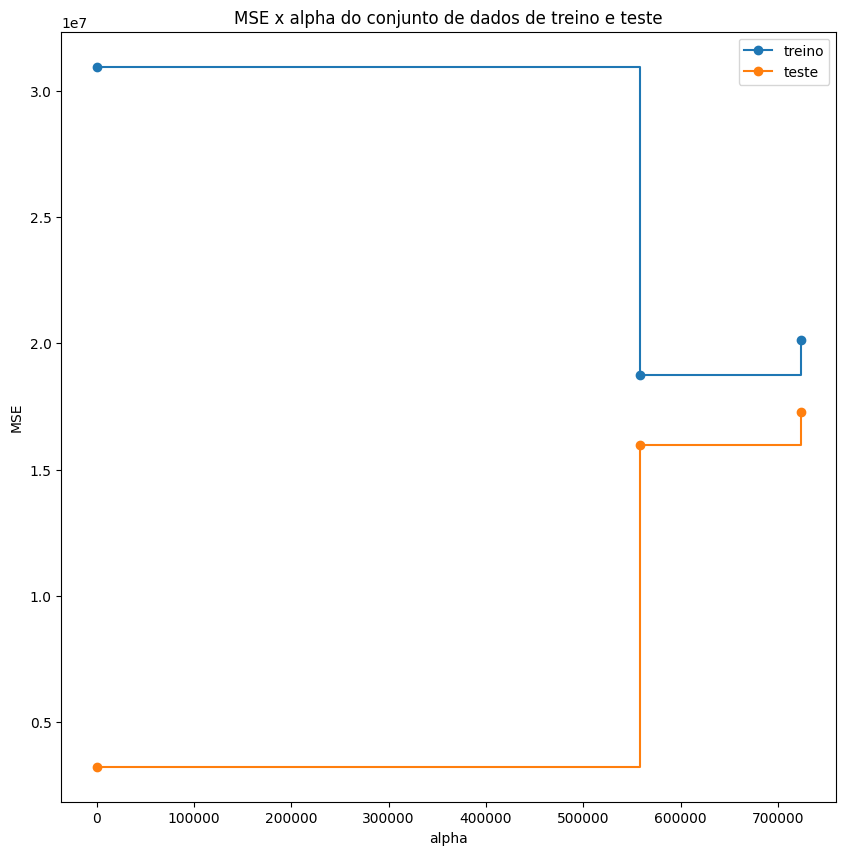

In [48]:
train_scores = [mean_squared_error(y_train_arvore , clf.predict(X_train_arvore)) for clf in clfs]
test_scores  = [mean_squared_error(y_test_arvore, clf.predict(X_test_arvore)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

Resumo Geral
-----
Entre todos os modelos a árvore de regressão teve um melhor R² com 50%